<a href="https://colab.research.google.com/github/mahikshith/Langgraph/blob/main/Adding_nodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install langgraph langchain

In [4]:
from typing import Dict , TypedDict
from langgraph.graph import StateGraph   # design and manage flow of tasks in ur application usinf graph

In [13]:
from posix import stat
# nodes pass information in the form of state

# state is in dict format

# state is data structure [shared] that keeps a track of everything as ur applcation runs

class AgentState(TypedDict) :
  message : str



# define node - node takes input as state and pass output as state [updated]

# need to add a doc string to expalin the functionality of the agent

def first_node(state : AgentState) -> AgentState :

  '''Simple node in the graph that just shows greet message to the state '''

  state["message"] = "Wasssup " + state["message"] + " how are u doing"

  return state


In [22]:
# creating graph

gf = StateGraph(AgentState)

gf.add_node("wassup",first_node)

# need to add start and end point of the node

gf.set_entry_point("wassup")

gf.set_finish_point("wassup")

app = gf.compile()


In [23]:
display(app.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'wassup': Node(id='wassup', name='wassup', data=wassup(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='wassup', data=None, conditional=False), Edge(source='wassup', target='__end__', data=None, conditional=False)])

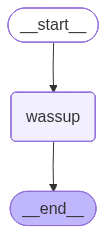

In [24]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
ans = app.invoke({"message" : "mykee"})

In [26]:
ans

{'message': 'Wasssup mykee how are u doing'}

In [27]:
ans["message"]   # reference the attribute

'Wasssup mykee how are u doing'